
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, f1_score
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer

In [ ]:
enc = OneHotEncoder()

In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1
...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0
269,57,0,0,140,241,1,123,0
270,45,1,3,110,264,1,132,0
271,68,1,0,144,193,1,141,0


In [ ]:
X = ha.drop('cp', axis = 1)
y = ha['cp']

In [ ]:
ct = ColumnTransformer(
    [
    ('dummify_sex', enc, ['sex']),
    ('dummify_rECG', enc, ['restecg'])],
    remainder = 'passthrough'
)

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


KNN

In [ ]:
my_pipeline = Pipeline(
    [('dummify',ct), ('knc', KNeighborsClassifier(n_neighbors = 3))]
)

In [ ]:
my_pipeline.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('knc', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
ypreds = my_pipeline.predict(X)
ypreds

array([3, 2, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 3, 2, 0, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0,
       2, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 1, 1, 3, 2,
       0, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.673992673992674

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[116,   2,   9,   1],
       [ 15,  19,   9,   1],
       [ 28,   5,  46,   2],
       [ 13,   1,   3,   3]])

In [ ]:
f1_score(y, ypreds, average='macro')

0.5380971111957028

Decision Tree

In [ ]:
my_pipeline3 = Pipeline(
    [('dummify',ct), ('dt', DecisionTreeClassifier(max_depth = 3))]
)

In [ ]:
my_pipeline3.fit(X, y)

Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('dt', DecisionTreeClassifier(max_depth=3))])

In [ ]:
ypreds = my_pipeline3.predict(X)
ypreds

array([3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 3, 3, 0, 2, 3, 3, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 3, 3, 3, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 3, 3,
       2, 2, 2, 0, 0, 3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 3, 0, 3, 2, 0, 3,
       0, 3, 3, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.5934065934065934

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[106,   0,  19,   3],
       [ 12,   0,  30,   2],
       [ 27,   0,  48,   6],
       [  8,   0,   4,   8]])

In [ ]:
f1_score(y, ypreds, average='macro')

0.42304433407636255

In [ ]:
dt_model = my_pipeline3.named_steps['dt']

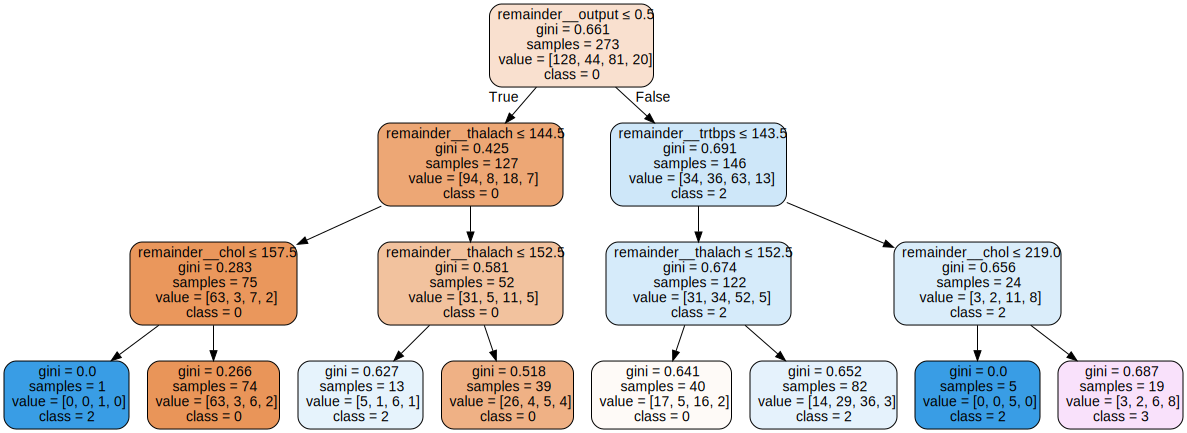

In [ ]:
feature_names_transformed = my_pipeline3.named_steps['dummify'].get_feature_names_out()

dt_model = my_pipeline3.named_steps['dt']

from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=feature_names_transformed,
                           class_names=dt_model.classes_.astype(str), # Use classes from the model
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

LDA

In [ ]:
my_pipeline_lda = Pipeline(
    [('dummify', ct), ('lda', LinearDiscriminantAnalysis())]
)

my_pipeline_lda.fit(X, y)

ypreds = my_pipeline_lda.predict(X)

accuracy = accuracy_score(y, ypreds)

confusedmetric = confusion_matrix(y, ypreds)

f1 = f1_score(y, ypreds, average='macro')

accuracy, confusedmetric, f1

(0.5714285714285714,
 array([[97,  1, 29,  1],
        [ 8,  2, 32,  2],
        [21,  5, 55,  0],
        [ 7,  0, 11,  2]]),
 0.3772660624815798)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha['cp_is_3'] = ha['cp'] == 3
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3
0,63,1,3,145,233,0,150,1,True
1,37,1,2,130,250,1,187,1,False
2,56,1,1,120,236,1,178,1,False
3,57,0,0,120,354,1,163,1,False
4,57,1,0,140,192,1,148,1,False
...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,False
269,57,0,0,140,241,1,123,0,False
270,45,1,3,110,264,1,132,0,True
271,68,1,0,144,193,1,141,0,False


In [ ]:
y = ha['cp_is_3']

In [ ]:
my_pipeline4 = Pipeline(
    [('dummify',ct), ('lg', LogisticRegression())]
)

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.9267399267399268

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[253,   0],
       [ 20,   0]])

In [ ]:
f1 = f1_score(y, ypreds)
f1

0.0

In [ ]:
ha['cp_is_2'] = ha['cp'] == 2
y = ha['cp_is_2']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True,

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.7106227106227107

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[184,   8],
       [ 71,  10]])

In [ ]:
f1 = f1_score(y, ypreds)
f1

0.20202020202020202

In [ ]:
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
y = ha['cp_is_1']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.8388278388278388

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[229,   0],
       [ 44,   0]])

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y, ypreds)
f1

0.0

In [ ]:
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
y = ha['cp_is_0']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

0.7472527472527473

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[111,  34],
       [ 35,  93]])

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y, ypreds)
f1

0.7294117647058824

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
new_ha = ha[ha['cp'].isin([0, 1])]
new_ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
2,56,1,1,120,236,1,178,1,False,False,1,0
3,57,0,0,120,354,1,163,1,False,False,0,1
4,57,1,0,140,192,1,148,1,False,False,0,1
5,56,0,1,140,294,0,153,1,False,False,1,0
6,44,1,1,120,263,1,173,1,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
267,63,0,0,124,197,1,136,0,False,False,0,1
268,59,1,0,164,176,0,90,0,False,False,0,1
269,57,0,0,140,241,1,123,0,False,False,0,1
271,68,1,0,144,193,1,141,0,False,False,0,1


In [ ]:
new_ha
X = new_ha.drop('cp', axis = 1)
y = new_ha['cp']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

1.0

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[128,   0],
       [  0,  44]])

In [ ]:
roc_auc_score(y, ypreds)

1.0

In [ ]:
new_ha = ha[ha['cp'].isin([0, 2])]
new_ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
1,37,1,2,130,250,1,187,1,False,True,0,0
3,57,0,0,120,354,1,163,1,False,False,0,1
4,57,1,0,140,192,1,148,1,False,False,0,1
7,52,1,2,172,199,1,162,1,False,True,0,0
8,57,1,2,150,168,1,174,1,False,True,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
266,63,1,0,140,187,0,144,0,False,False,0,1
267,63,0,0,124,197,1,136,0,False,False,0,1
268,59,1,0,164,176,0,90,0,False,False,0,1
269,57,0,0,140,241,1,123,0,False,False,0,1


In [ ]:
new_ha
X = new_ha.drop('cp', axis = 1)
y = new_ha['cp']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y, ypreds)
accuracy

1.0

In [ ]:
confusedmetric = confusion_matrix(y, ypreds)
confusedmetric

array([[128,   0],
       [  0,  81]])

In [ ]:
roc_auc_score(y, ypreds)

1.0

In [ ]:
new_ha = ha[ha['cp'].isin([0, 3])]

In [ ]:
columns_to_drop = ['cp_is_3', 'cp_is_2', 'cp_is_1', 'cp_is_0']

new_ha.drop(columns=columns_to_drop, axis=1, inplace=True)


<ipython-input-70-37b7b91f6d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
X = new_ha.drop('cp', axis = 1)
y = new_ha['cp']

In [ ]:
my_pipeline4.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('dummify',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify_sex',
                                                  OneHotEncoder(), ['sex']),
                                                 ('dummify_rECG',
                                                  OneHotEncoder(),
                                                  ['restecg'])])),
                ('lg', LogisticRegression())])

In [ ]:
ypreds = my_pipeline4.predict(X)
ypreds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
roc_auc_score(y, ypreds)

0.575

In [ ]:
from sklearn.metrics import f1_score
f1_score(y, ypreds, average='macro')


0.5992992514731645